In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [2]:
#Ruta figures por capitulo
results_path = "/home/andres/Dropbox/Manuscrito_Thesis/Tesis_Andrés_López/figures/results/"

In [40]:
# leer archivo
with open("../../results/halos_history_3.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    parts = line.strip().split("], [")
    ids = ast.literal_eval(parts[0] + "]")
    snaps = ast.literal_eval("[" + parts[1])
    
    # emparejar id con su snap
    for halo_id, snap in zip(ids, snaps):
        rows.append({"halo_id": halo_id, "snap": snap})

# convertir a DataFrame
history = pd.DataFrame(rows)

history.head(14)

,halo_id,snap
0,0,99
1,0,91
2,0,81
3,0,67
4,0,59
5,0,50
6,1,44
7,1,40
8,1,33
9,2,29


In [56]:
history['snap'].unique()

array([99, 91, 81, 67, 59, 50, 44, 40, 33, 29, 25, 21])

In [28]:
halo3_f_z0 = pd.read_csv('../../results/Halos_50_3_F_z0.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d1 = pd.read_csv('../../results/Halos_50_3_F_z0d1.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d24 = pd.read_csv('../../results/Halos_50_3_F_z0d24.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d5 = pd.read_csv('../../results/Halos_50_3_F_z0d5.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z0d7 = pd.read_csv('../../results/Halos_50_3_F_z0d7.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1 = pd.read_csv('../../results/Halos_50_3_F_z1.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1d25 = pd.read_csv('../../results/Halos_50_3_F_z1d25.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z1d5 = pd.read_csv('../../results/Halos_50_3_F_z1d5.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z2 = pd.read_csv('../../results/Halos_50_3_F_z2.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z2d44 = pd.read_csv('../../results/Halos_50_3_F_z2d44.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z3 = pd.read_csv('../../results/Halos_50_3_F_z3.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])
halo3_f_z4 = pd.read_csv('../../results/Halos_50_3_F_z4.dat', sep='\s+', header=None, names=['X', 'Y', 'Z','Mvir','Rvir','Mdom','Npart'])

In [41]:
history['snap'].unique()

array([99, 91, 81, 67, 59, 50, 44, 40, 33, 29, 25, 21])

In [42]:
# función para convertir snap a z
def snap2z(snap):
    if snap == 99:
        return 0
    if snap == 91:
        return 0.1
    if snap == 81:
        return 0.24
    if snap == 67:
        return 0.5
    if snap == 59:
        return 0.7
    if snap == 50:
        return 1
    if snap == 44:
        return 1.25
    if snap == 40:
        return 1.5
    if snap == 33:
        return 2
    if snap == 29:
        return 2.44
    if snap == 25:
        return 3.01
    if snap == 21:
        return 4.01

In [43]:
def epoch(z):
    if z == 0:
        return 0
    if z == 0.1:
        return 1
    if z == 0.24:
        return 2
    if z == 0.5:
        return 3
    if z == 0.7:
        return 4
    if z == 1:
        return 5
    if z == 1.25:
        return 6
    if z == 1.5:
        return 7
    if z == 2:
        return 8
    if z == 2.44:
        return 9
    if z == 3.01:
        return 10
    if z == 4.01:
        return 11 

In [44]:
history['z'] = history['snap'].apply(snap2z)
history['epoch'] = history['z'].apply(epoch)

In [45]:
history.head(11)

,halo_id,snap,z,epoch
0,0,99,0.00,0
1,0,91,0.10,1
2,0,81,0.24,2
3,0,67,0.50,3
4,0,59,0.70,4
5,0,50,1.00,5
6,1,44,1.25,6
7,1,40,1.50,7
8,1,33,2.00,8
9,2,29,2.44,9


In [34]:
halos = [halo3_f_z0, halo3_f_z0d1, halo3_f_z0d24, halo3_f_z0d5, halo3_f_z0d7,halo3_f_z1, halo3_f_z1d25, halo3_f_z1d5, halo3_f_z2, halo3_f_z2d44, halo3_f_z3, halo3_f_z4]

In [46]:
Mdomains = []
Mvirs = []
Rvirs = []

for i, snap in enumerate(history['snap']):
    id = int(history['halo_id'].iloc[i])

    #to get [halo3_f_z0, halo3_f_z0d1, halo3_f_z0d24, halo3_f_z0d5, halo3_f_z0d7, halo3_f_z1d25] at some z
    epochs = history['epoch'].iloc[i]
    Halo = halos[epochs]
    
    mdom = Halo.iloc[id]['Mdom'] 
    mvir = Halo.iloc[id]['Mvir']
    rvir = Halo.iloc[id]['Rvir']

    Mdomains.append(mdom)
    Mvirs.append(mvir)
    Rvirs.append(rvir)

history['Mdom'] = Mdomains
history['Mvir'] = Mvirs
history['Rvir'] = Rvirs


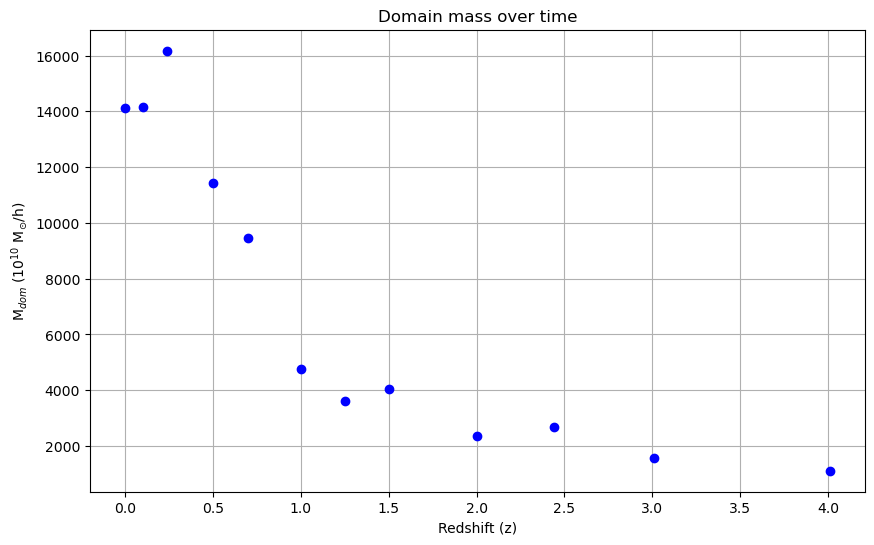

In [48]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:12]['z'], history.iloc[0:12]['Mdom'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{dom}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

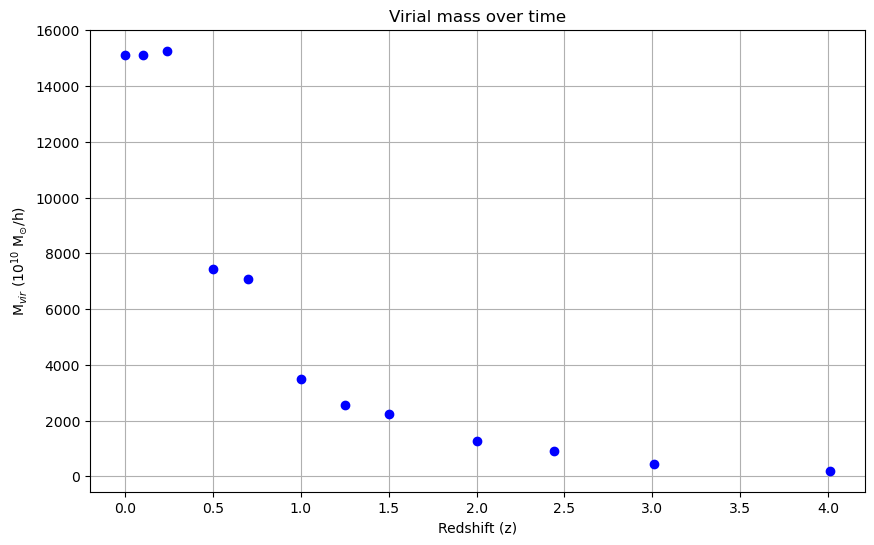

In [49]:
#Grafica de acreción de masa
fig = plt.figure(figsize=(10, 6))
plt.plot(history.iloc[0:12]['z'], history.iloc[0:12]['Mvir'],'o',color='b')
plt.xlabel('Redshift (z)')
plt.ylabel('M$_{vir}$ ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

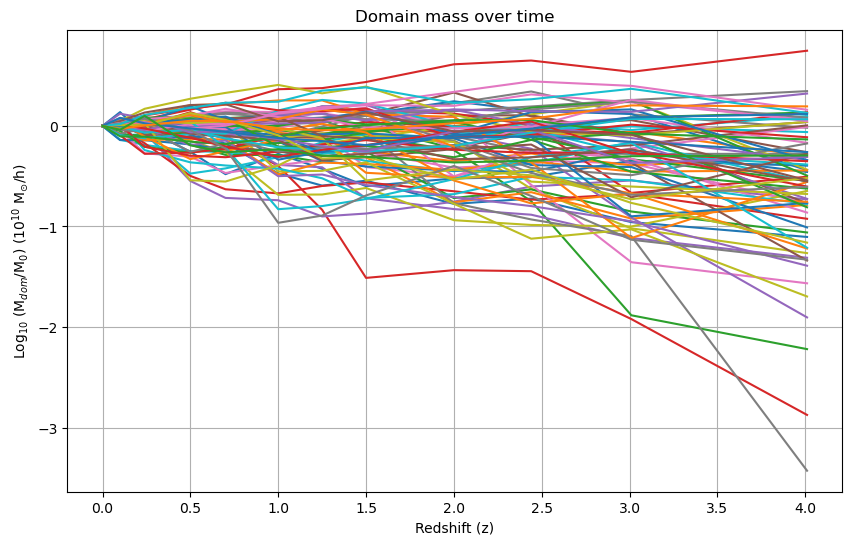

In [52]:
fig = plt.figure(figsize=(10, 6))
i = 0
zs = [0, 0.1, 0.24, 0.5, 0.7, 1, 1.25, 1.5, 2, 2.44, 3.01, 4.01]
hal = []
zsgraph = []

k = 0
while i < 1000:

    if k < len(zs) and history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mdom']
        hal.append(np.log10(history.iloc[i]['Mdom']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{dom}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Domain mass over time')
plt.grid()
plt.show()

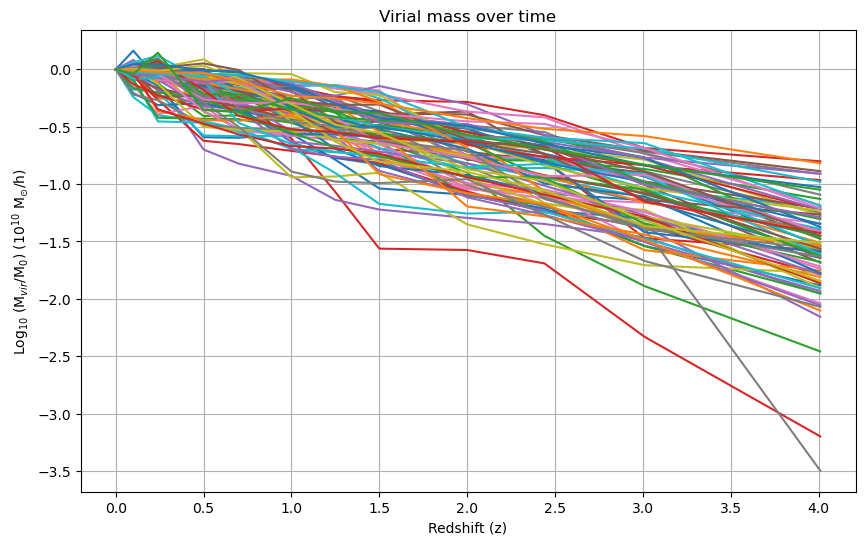

In [53]:
fig = plt.figure(figsize=(10, 6))
i = 0
hal = []
zsgraph = []

k = 0
while i < 1000:

    if k < len(zs) and history.iloc[i]['z'] == zs[k]:
        if k == 0:
            M0 = history.iloc[i]['Mvir']
        hal.append(np.log10(history.iloc[i]['Mvir']/M0))
        zsgraph.append(history.iloc[i]['z'])
        i += 1
        k += 1
    else:
        plt.plot(zsgraph, hal)
        hal = []
        zsgraph = []
        k = 0
        i = i

plt.xlabel('Redshift (z)')
plt.ylabel('Log$_{10}$ (M$_{vir}$/M$_{0}$) ($10^{10}$ M$_{\odot}$/h)')
plt.title('Virial mass over time')
plt.grid()
plt.show()

In [54]:
#escribir un archivo csv con el dataframe history
history.to_csv('../../results/halos3_full_history.csv', index=False)

In [55]:
history.head()

,halo_id,snap,z,epoch,Mdom,Mvir,Rvir
0,0,99,0.00,0,14134.211133,15105.009766,1082.818237
1,0,91,0.10,1,14142.081714,15121.164062,1122.818848
2,0,81,0.24,2,16171.532828,15269.416992,1171.472168
3,0,67,0.50,3,11444.309925,7433.882812,964.918091
4,0,59,0.70,4,9452.199316,7062.108398,969.804260
